In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [3]:
def Assining_Variables():
    fle1 = "6M-0K-99K.users.dataset.public.csv"
    fle2 = "Buyers-repartition-by-country.csv"
    fle3 = "Comparison-of-Sellers-by-Gender-and-Country.csv"
    fle4 = "Countries-with-Top-Sellers-(Fashion-C2C).csv"
    return fle1,fle2,fle3,fle4

In [4]:
def load_dataset(fle1,fle2,fle3,fle4):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)  
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info

In [5]:
 def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [6]:
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.identifierHash.isnull().sum()
        #df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on identifierHash are: {0}".format(df_air_store))
        #print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.identifierHash.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (identifierhash) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        return dfff,df_nadn

In [7]:
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [8]:
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   
    # Define the ratio of gap of each fragment in a tuple
    #explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05)
    # DataFrame of each student and the votes they get df_nan_disp['Data Name'],df_nan_disp['NAN Count for each Column']
    #dft = pd.DataFrame({'Data Name': dfg.columns,'NAN Count for each Column':dft_val1})
    # Plotting the pie chart for above dataframe
    # Data to plot
    #labels = dfg.columns.values
    #sddd = dft_val1.values
    #sizes = [215, 130,215, 130,215, 130,215, 130,215, 130,215, 130,215, 130]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0)  # explode 1st slice
    # Plot
    #plt.pie(sddd, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    #plt.axis('equal')
    #plt.show()

In [9]:
def Final_Dataset():
        fle1,fle2,fle3,fle4 = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info = load_dataset(fle1,fle2,fle3,fle4)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        """df_air_visit_data = df_air_visit_data.reset_index()
        df_air_reserve = df_air_reserve.reset_index()
        df_air_store_info = df_air_store_info.reset_index()
        df_date_info = df_date_info.reset_index()"""
        #df_n = pd.concat([df_air_visit_data['country'],df_date_info], axis=1, join="outer")
        df_n = pd.merge(df_air_visit_data,df_date_info,on='country',how="outer")
        #df_nn = pd.concat([df_air_reserve,df_air_store_info], axis=1, join="outer")
        df_nn = pd.merge(df_air_reserve,df_air_store_info,on='country',how="outer")
        df = pd.concat([df_n,df_nn], axis=0, join="outer")
        #df = pd.merge(df_n,df_nn,on='country',how="outer")
        #print(df_n)
        print(df)
        print(df_n.shape)
        print(df_nn.shape)
        print(df.shape)
        return df

In [10]:
df = Final_Dataset()

The shape of 6M-0K-99K.users.dataset.public.csv is (98913, 24)
The shape of Buyers-repartition-by-country.csv is (62, 32)
The shape of Comparison-of-Sellers-by-Gender-and-Country.csv is (73, 19)
The shape of Countries-with-Top-Sellers-(Fashion-C2C).csv is (19, 26)
    identifierHash  type        country language  socialNbFollowers  \
0    -7.279641e+18  user     Etats-Unis       en                3.0   
1    -6.727673e+18  user     Etats-Unis       en                3.0   
2     2.543720e+18  user     Etats-Unis       en                3.0   
3     6.412145e+18  user     Etats-Unis       en                3.0   
4     6.359422e+18  user     Etats-Unis       en                3.0   
..             ...   ...            ...      ...                ...   
89             NaN   NaN     Martinique      NaN                NaN   
90             NaN   NaN  Îles Canaries      NaN                NaN   
91             NaN   NaN            NaN      NaN                NaN   
92             NaN   NaN 

Total NAN values are : 4355794
Data with at least 1 NAN values: 99007
Rows filled NAN data: 0
Count of NAN values on identifierHash are: 94
Number of Invalid IDs (identifierhash) are : 94
+---------------------------+-------------+
|                           |   Nan count |
|---------------------------+-------------|
| identifierHash            |          94 |
| type                      |          94 |
| country                   |           3 |
| language                  |          94 |
| socialNbFollowers         |          94 |
| socialNbFollows           |          94 |
| socialProductsLiked       |          94 |
| productsListed            |          94 |
| productsSold              |          94 |
| productsPassRate          |          94 |
| productsWished            |          94 |
| productsBought            |          94 |
| gender                    |          94 |
| civilityGenderId          |          94 |
| civilityTitle             |          94 |
| hasAnyApp         

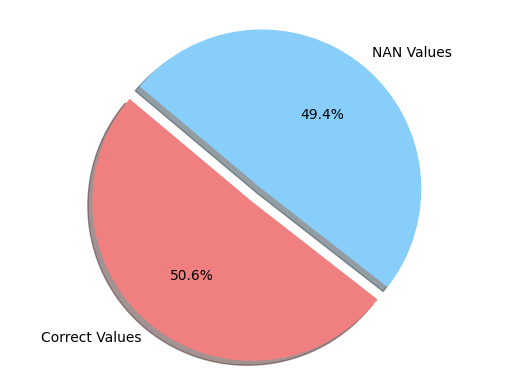

+---------------------------+------------------+
|                           |   % of NAN Count |
|---------------------------+------------------|
| identifierHash            |       0.0949428  |
| type                      |       0.0949428  |
| country                   |       0.00303009 |
| language                  |       0.0949428  |
| socialNbFollowers         |       0.0949428  |
| socialNbFollows           |       0.0949428  |
| socialProductsLiked       |       0.0949428  |
| productsListed            |       0.0949428  |
| productsSold              |       0.0949428  |
| productsPassRate          |       0.0949428  |
| productsWished            |       0.0949428  |
| productsBought            |       0.0949428  |
| gender                    |       0.0949428  |
| civilityGenderId          |       0.0949428  |
| civilityTitle             |       0.0949428  |
| hasAnyApp                 |       0.0949428  |
| hasAndroidApp             |       0.0949428  |
| hasIosApp         

In [11]:
total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
#Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
df_nan_disp = pd.DataFrame()
Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
#Printing the number of NANs in each column
n_rows = len(df)
for i in range(0,len(df_najn)):
    nan_percent_in_each_col = ((df_najn/n_rows)*100)
    df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))

In [12]:
df.drop(['buyers','topbuyers','topbuyerratio','femalebuyers','malebuyers','topfemalebuyers','topmalebuyers','femalebuyersratio','topfemalebuyersratio','boughtperwishlistratio','boughtperlikeratio','topboughtperwishlistratio','topboughtperlikeratio','totalproductsbought','totalproductswished','totalproductsliked_x','toptotalproductsbought','toptotalproductswished','toptotalproductsliked','meanproductsbought_x','meanproductswished_x','meanproductsliked_x','topmeanproductsbought','topmeanproductswished','topmeanproductsliked','meanfollowers_x','sex','nbsellers','meansellerpassrate','meanproductsbought_y','meanproductswished_y','meanproductsliked_y','totalbought','totalwished','totalproductsliked_y','meanfollowers_y','meanfollows','percentofappusers','percentofiosusers','meanseniority'],axis=1,inplace=True)

In [13]:
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,-7.279641e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
1,-6.727673e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
2,2.543720e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
3,6.412145e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
4,6.359422e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,NaN,NaN,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,1.00,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,Îles Canaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.00,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.400000,3.54,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.520000,2.88,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dropna(subset=['productsBought'],inplace=True)

In [15]:
df_nadbjn = Counting_NAN_Values(df)

+------------------------+-------------+
|                        |   Nan count |
|------------------------+-------------|
| identifierHash         |           0 |
| type                   |           0 |
| country                |           0 |
| language               |           0 |
| socialNbFollowers      |           0 |
| socialNbFollows        |           0 |
| socialProductsLiked    |           0 |
| productsListed         |           0 |
| productsSold           |           0 |
| productsPassRate       |           0 |
| productsWished         |           0 |
| productsBought         |           0 |
| gender                 |           0 |
| civilityGenderId       |           0 |
| civilityTitle          |           0 |
| hasAnyApp              |           0 |
| hasAndroidApp          |           0 |
| hasIosApp              |           0 |
| hasProfilePicture      |           0 |
| daysSinceLastLogin     |           0 |
| seniority              |           0 |
| seniorityAsMon

In [16]:
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,-7.279641e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
1,-6.727673e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
2,2.543720e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
3,6.412145e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
4,6.359422e+18,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,93.0,71.333333,6.446667,5.44,266.1,76.8,14.6,10.2,105.0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-2.153409e+18,user,Samoa,en,3.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98909,5.863332e+18,user,Mayotte,fr,3.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98910,6.319028e+18,user,Saint Kitts et Nevis,en,3.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98911,-2.380645e+18,user,Swaziland,fr,3.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(df.sellers.median())
print(df.topsellers.median())
print(df.topsellerratio.median())
print(df.femalesellersratio.median())
print(df.topfemalesellersratio.median())
print(df.femalesellers.median())
print(df.malesellers.median())
print(df.topfemalesellers.median())
print(df.topmalesellers.median())
print(df.countrysoldratio.median())
print(df.bestsoldratio.median())
print(df.toptotalproductssold.median())
print(df.totalproductssold.median())
print(df.toptotalproductslisted.median())
print(df.totalproductslisted.median())
print(df.topmeanproductssold.median())
print(df.topmeanproductslisted.median())
print(df.meanproductssold.median())
print(df.meanproductslisted.median())
print(df.meanofflinedays.median())
print(df.topmeanofflinedays.median())
print(df.meanfollowers.median())
print(df.meanfollowing.median())
print(df.topmeanfollowers.median())
print(df.topmeanfollowing.median())

289.0
21.0
4.0
77.8
80.0
232.0
57.0
18.0
3.0
1.59
1.4
972.0
1806.0
449.0
927.0
46.285714285714285
31.68
6.249134948096885
3.207612456747405
227.1
36.6
10.7
14.6
53.2
17.2


In [18]:
df['sellers'] = df['sellers'].replace(np.nan,289.0)
df['topsellers'] = df['topsellers'].replace(np.nan,21.0)
df['topsellerratio'] = df['topsellerratio'].replace(np.nan,4.0)
df['femalesellersratio'] = df['femalesellersratio'].replace(np.nan,77.8)
df['topfemalesellersratio'] = df['topfemalesellersratio'].replace(np.nan,80.0)
df['femalesellers'] = df['femalesellers'].replace(np.nan,232.0)
df['malesellers'] = df['malesellers'].replace(np.nan,57.0)
df['topfemalesellers'] = df['topfemalesellers'].replace(np.nan,18.0)
df['topmalesellers'] = df['topmalesellers'].replace(np.nan,3.0)
df['countrysoldratio'] = df['countrysoldratio'].replace(np.nan,1.59)
df['bestsoldratio'] = df['bestsoldratio'].replace(np.nan,1.4)
df['toptotalproductssold'] = df['toptotalproductssold'].replace(np.nan,972.0)
df['totalproductssold'] = df['totalproductssold'].replace(np.nan,1806.0)
df['toptotalproductslisted'] = df['toptotalproductslisted'].replace(np.nan,449.0)
df['totalproductslisted'] = df['totalproductslisted'].replace(np.nan,927.0)
df['topmeanproductssold'] = df['topmeanproductslisted'].replace(np.nan,46.285714285714285)
df['topmeanproductslisted'] = df['topmeanproductslisted'].replace(np.nan,31.68)
df['meanproductssold'] = df['meanproductssold'].replace(np.nan,6.249134948096885)
df['meanproductslisted'] = df['meanproductslisted'].replace(np.nan,3.207612456747405)
df['meanofflinedays'] = df['meanofflinedays'].replace(np.nan,227.1)
df['topmeanofflinedays'] = df['topmeanofflinedays'].replace(np.nan,36.6)
df['meanfollowers'] = df['meanfollowers'].replace(np.nan,10.7)
df['meanfollowing'] = df['meanfollowing'].replace(np.nan,14.6)
df['topmeanfollowers'] = df['topmeanfollowers'].replace(np.nan,53.2)
df['topmeanfollowing'] = df['topmeanfollowing'].replace(np.nan,17.2)

In [19]:
df_nadbjn = Counting_NAN_Values(df)

+------------------------+-------------+
|                        |   Nan count |
|------------------------+-------------|
| identifierHash         |           0 |
| type                   |           0 |
| country                |           0 |
| language               |           0 |
| socialNbFollowers      |           0 |
| socialNbFollows        |           0 |
| socialProductsLiked    |           0 |
| productsListed         |           0 |
| productsSold           |           0 |
| productsPassRate       |           0 |
| productsWished         |           0 |
| productsBought         |           0 |
| gender                 |           0 |
| civilityGenderId       |           0 |
| civilityTitle          |           0 |
| hasAnyApp              |           0 |
| hasAndroidApp          |           0 |
| hasIosApp              |           0 |
| hasProfilePicture      |           0 |
| daysSinceLastLogin     |           0 |
| seniority              |           0 |
| seniorityAsMon

In [20]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()
df['identifierHash'] = lab.fit_transform(df['identifierHash'])
df['type'] = lab.fit_transform(df['type'])
df['country'] = lab.fit_transform(df['country'])
df['language'] = lab.fit_transform(df['language'])
df['civilityTitle'] = lab.fit_transform(df['civilityTitle'])
df['hasAnyApp'] = lab.fit_transform(df['hasAnyApp'])
df['hasAndroidApp'] = lab.fit_transform(df['hasAndroidApp'])
df['hasIosApp'] = lab.fit_transform(df['hasIosApp'])
df['hasAndroidApp'] = lab.fit_transform(df['hasAndroidApp'])
df['hasProfilePicture'] = lab.fit_transform(df['hasProfilePicture'])
df['countryCode'] = lab.fit_transform(df['countryCode'])
df['gender'] = lab.fit_transform(df['gender'])
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,10480,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2
1,13438,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2
2,63148,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2
3,83833,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2
4,83571,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,38037,0,155,1,3.0,8.0,0.0,0.0,0.0,0.0,...,46.285714,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2
98909,80860,0,116,3,3.0,8.0,0.0,0.0,0.0,0.0,...,46.285714,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2
98910,83360,0,152,1,3.0,8.0,0.0,0.0,0.0,0.0,...,46.285714,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2
98911,36825,0,167,3,3.0,8.0,0.0,0.0,0.0,0.0,...,46.285714,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2


In [21]:
X = df.drop("productsBought",axis=1)
y = df['productsBought']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
def Performance_Evaluation():
    clf = RandomForestRegressor(n_estimators=13, random_state=3, max_depth=18,
                                        min_weight_fraction_leaf=0.0002)
    clf.fit(X_train,np.log1p(y_train))
    y_pred_ts = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    print("Predicted values:")
    print(y_pred_ts)
    print ('Test Accuracy:',  clf.score(X_test,y_pred_ts)*100)
    print ('Training Accuracy:',  clf.score(X_train,y_pred_tr)*100) 
    ts_acc = clf.score(X_test,y_pred_ts)*100
    tr_acc = clf.score(X_train,y_pred_tr)*100
    Mean_acc = (((ts_acc+tr_acc)/2))
    return y_pred_ts,clf,y_pred_tr

In [25]:
y_pred_ts,clf,y_pred_tr = Performance_Evaluation()

Predicted values:
[0.00165062 0.00296711 0.15807325 ... 0.         0.00368867 0.00592433]
Test Accuracy: 100.0
Training Accuracy: 100.0


In [26]:
print("Training before tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_train), y_pred_tr))
print ('MSE:', mean_squared_error(np.log1p(y_train), y_pred_tr))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_train), y_pred_tr)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_train), y_pred_tr))))
print ('R2:', r2_score(np.log1p(y_train), y_pred_tr))
print("Test before tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_test), y_pred_ts))
print ('MSE:', mean_squared_error(np.log1p(y_test), y_pred_ts))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_test), y_pred_ts)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_test), y_pred_ts))))
print ('R2:', r2_score(np.log1p(y_test), y_pred_ts))

Training before tuning

MAE: 0.061272927306105576
MSE: 0.03466943179889215
RMSE: 0.18619729267336876
RMSLE: -1.6809484541301132
R2: 0.5578735183254222
Test before tuning

MAE: 0.07332985686127086
MSE: 0.051405806621734766
RMSE: 0.2267284865687035
RMSLE: -1.4840020718035585
R2: 0.40734081045446024


In [27]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 18, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0002, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


In [28]:
!pip install scipy
from scipy.stats import randint as sp_randint
dt = RandomForestRegressor()

# hyper parameters
""""dt_param = dict(n_estimators = [5,10,15,20,25,30],
                max_features = ['auto', 'sqrt','log2',None],
                criterion = ['friedman_mse', 'absolute_error'],
                max_depth = [100,200,300,400,500,600,700,800,900,1000],
              min_samples_split = [250,370,490,560,640,730,870,980,1250,1890],
                ccp_alpha = [0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045],
                 min_samples_leaf= [1,2,5,10,17,26,37,50,65,82],
                bootstrap = [True, False]
                #min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
               #max_leaf_nodes = [5,10,20,30,40,50,60,70,80,90,100]
               )"""
""""dt_param = dict(n_estimators = [5, 10, 50, 100, 250, 500],
                max_depth = [1, 5, 10, 50, 100])"""
# hyper parameters
"""dt_param = dict(n_estimators = [5, 10, 50, 100, 250, 500],
                max_depth = [1, 5, 10, 50,100],
                #ccp_alpha = [0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045],
                #bootstrap = [True, False],
                #criterion = ['mse', 'mae'],
                #max_depth = [1, 5, 10, 50,100],
              min_samples_split = [5, 10, 100, 500],
                max_features = ['auto', 'sqrt','log2'],
                 min_samples_leaf= [1,5, 10, 50,100])"""
dt_param = dict(n_estimators = [5, 10, 50, 100, 250, 500],
                max_depth = [1, 5, 10, 50,100],
                #ccp_alpha = [0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045],
                #bootstrap = [True, False],
                #criterion = ['mse', 'mae'],
                #max_depth = [1, 5, 10, 50,100],
              min_samples_split = [5, 10, 100, 500],
                max_features = ['auto', 'sqrt','log2'],
                 min_samples_leaf= [1,5, 10, 50,100])

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# grid search
rf_random = RandomizedSearchCV(estimator=dt,
                      param_distributions=dt_param,
                      #scoring=rmsle_scorer,
                      n_jobs=-1,
                      cv=5,n_iter=10,
                      verbose=10,
                      return_train_score=True)

In [30]:
rf_random.fit(X_train, np.log1p(y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimators=5
[CV 1/5; 1/10] END max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimators=5;, score=(train=0.138, test=0.141) total time=   0.1s
[CV 2/5; 1/10] START max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimators=5
[CV 2/5; 1/10] END max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimators=5;, score=(train=0.049, test=0.045) total time=   0.1s
[CV 3/5; 1/10] START max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimators=5
[CV 3/5; 1/10] END max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimators=5;, score=(train=0.150, test=0.168) total time=   0.1s
[CV 4/5; 1/10] START max_depth=1, max_features=log2, min_samples_leaf=100, min_samples_split=500, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 50, 100],
                                        'min_samples_split': [5, 10, 100, 500],
                                        'n_estimators': [5, 10, 50, 100, 250,
                                                         500]},
                   return_train_score=True, verbose=10)

In [31]:
print(rf_random.best_params_)

{'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 50, 'max_features': 'auto', 'max_depth': 10}


In [32]:
y_pred1 = rf_random.predict(X_test)
y_pred2 = rf_random.predict(X_train)
print("Predicted values:")
print(y_pred1)
print ('Test Accuracy:',  rf_random.score(X_test,y_pred1)*100)
print ('Training Accuracy:',  rf_random.score(X_train,y_pred2)*100) 

Predicted values:
[0.00558329 0.00469032 0.05954872 ... 0.00177018 0.00525446 0.00513947]
Test Accuracy: 100.0
Training Accuracy: 100.0


In [33]:
print("Training after tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_train), y_pred2))
print ('MSE:', mean_squared_error(np.log1p(y_train), y_pred2))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_train), y_pred2)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_train), y_pred2))))
print ('R2:', r2_score(np.log1p(y_train), y_pred2))
print("Test after tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_test), y_pred1))
print ('MSE:', mean_squared_error(np.log1p(y_test), y_pred1))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_test), y_pred1)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_test), y_pred1))))
print ('R2:', r2_score(np.log1p(y_test), y_pred1))

Training after tuning

MAE: 0.07060738764442029
MSE: 0.044851974673573033
RMSE: 0.21178284792110297
RMSLE: -1.552193831525138
R2: 0.4280193031828753
Test after tuning

MAE: 0.07444776891440552
MSE: 0.051498225567196354
RMSE: 0.2269322047819488
RMSLE: -1.483103963455965
R2: 0.4062753094747955


In [35]:
df_new = pd.DataFrame({'productsBoughtNew':y_pred1})
df['productsBoughtNew'] = df_new
print(df.productsBoughtNew.median())
df['productsBoughtNew'] = df['productsBoughtNew'].replace(np.nan,0.00702710154731206)
df

0.00702710154731206


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing,productsBoughtNew
0,10480,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2,0.005583
1,13438,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2,0.004690
2,63148,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2,0.059549
3,83833,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2,0.068371
4,83571,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,...,71.333333,6.446667,5.440000,266.1,76.8,14.6,10.2,105.0,17.2,0.004564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,38037,0,155,1,3.0,8.0,0.0,0.0,0.0,0.0,...,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2,0.007027
98909,80860,0,116,3,3.0,8.0,0.0,0.0,0.0,0.0,...,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2,0.007027
98910,83360,0,152,1,3.0,8.0,0.0,0.0,0.0,0.0,...,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2,0.007027
98911,36825,0,167,3,3.0,8.0,0.0,0.0,0.0,0.0,...,31.680000,6.249135,3.207612,227.1,36.6,10.7,14.6,53.2,17.2,0.007027


In [36]:
dfg = df.groupby(['socialProductsLiked', 'productsListed', 'productsWished', 'productsPassRate'])['productsBoughtNew'].apply(lambda x: (x>1)).count()
dfg

98913

In [37]:
dfgg = df.groupby(['socialProductsLiked', 'productsListed', 'productsWished', 'productsPassRate','seniorityAsYears'])['productsBoughtNew'].apply(lambda x: (x<1)).count()
dfgg

98913

In [38]:
dfgg = df.groupby(['countryCode','socialProductsLiked', 'productsListed', 'productsWished', 'productsPassRate','seniorityAsYears'])['productsBoughtNew'].apply(lambda x: (x>1)).count()
dfgg

98913

In [39]:
dfg = df.groupby(['socialProductsLiked', 'productsListed', 'productsWished', 'productsPassRate'])['productsBoughtNew'].apply(lambda x: (x>1)).count()
dfg

98913